<a href="https://colab.research.google.com/github/Skantastico/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DSPT3_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.6MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
import numpy as np

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
# Use wget to get data from url

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-09-16 01:34:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-09-16 01:34:57 (488 MB/s) - ‘haberman.data’ saved [3103/3103]



In [68]:
# Load the Dataset using pandas and inspect
df = pd.read_csv('haberman.data', header=None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [69]:
# There should be 306 rows, 4 columns

df.shape

(306, 4)

In [70]:
# Shows 305 rows, Set header to None
df.shape

(306, 4)

In [71]:
#Verify No Missing Values or correct if so

df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [72]:
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [73]:
# Give Columns better names

column_headers = ['age', 'year', '# of nodes', 'status']

df = pd.read_csv('haberman.data', header=None, names=column_headers)
df.head()

,age,year,# of nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [74]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [75]:
df['status'].replace({2: 0}, inplace=True)
df

,age,year,# of nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [76]:
#Print the first five rows
df.head(5)

,age,year,# of nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
import seaborn

In [173]:
#Create Bins for Age Range

age_bins = pd.cut(df['age'], 6) # Turn into 6 bins

# Crosstab Age with status

rel_1 = pd.crosstab(df['status'], age_bins, normalize='columns')
rel_1

age,"(29.947, 38.833]","(38.833, 47.667]","(47.667, 56.5]","(56.5, 65.333]","(65.333, 74.167]","(74.167, 83.0]"
status,,,,,,
0,0.088235,0.315068,0.3,0.239437,0.272727,0.4
1,0.911765,0.684932,0.7,0.760563,0.727273,0.6


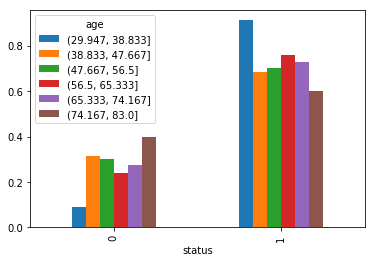

In [174]:
# Plot this relationship

rel_1.plot(kind='bar')

In [175]:
# Do Same with year of procedure instead of age

year_bins = pd.cut(df['year'], 6) # Turn into 6 bins

# Crosstab year of procedure with status

rel_2 = pd.crosstab(df['status'], year_bins, normalize='columns')
rel_2

year,"(57.989, 59.833]","(59.833, 61.667]","(61.667, 63.5]","(63.5, 65.333]","(65.333, 67.167]","(67.167, 69.0]"
status,,,,,,
0,0.333333,0.12963,0.283019,0.355932,0.188679,0.291667
1,0.666667,0.87037,0.716981,0.644068,0.811321,0.708333


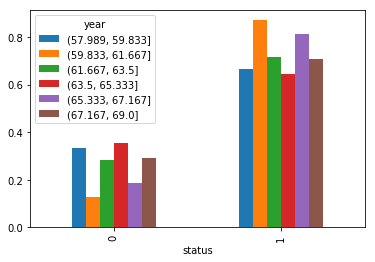

In [176]:
# Plot this relationship

rel_2.plot(kind='bar')

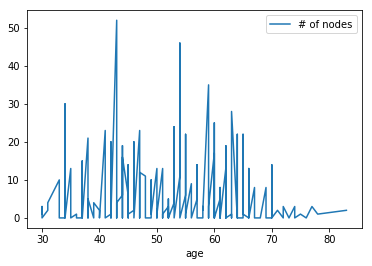

In [177]:
#Third relationship, attempting to find neutral trend

df.plot.line('age', '# of nodes')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
# Survived Dataframe

survived = df[df['status'] == 1]

# Did not survive Dataframe

did_not_survive = df[df['status'] == 0] 

In [158]:
survived.head()

,age,year,# of nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


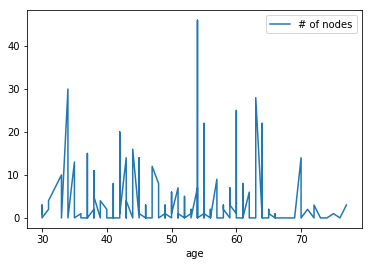

In [178]:
survived.plot.line('age', '# of nodes')

In [159]:
did_not_survive.head()

,age,year,# of nodes,status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


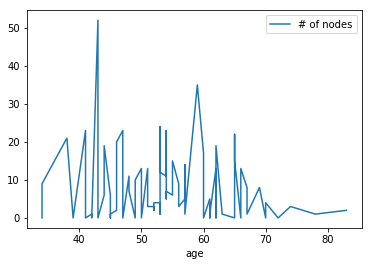

In [179]:
did_not_survive.plot.line('age', '# of nodes')

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

Analysis:

1. One feature that appeared to have a positive relationship with survival is the year in which the procedure was done. The more recent, the better chance for survival (rel_2 above)

2. One feature that appeared to have a negative relationship with survival is the age at which the procedure was done. The younger you were when it happened, the better your chance for survival (drastic dropoff after first bin in rel_1 above).

3. These features are related with each other in that your best chance for survival was to combine the two to be 1)as young as possible when the procedure was done and 2) to have had it done more recently as opposed to earlier in the past. These are mostly at odds with each other, but goldilocks cases could certainly exist.

In [0]:
# Any Supplemental Code for Analysis Here